# GI Exploration

- Sets up a test environment to try out different calculations of GI

In [1]:
from gen_grief_data import *
import math

In [2]:
'''
GI Protoype, some other formulations of the GI, you know for variety
'''
def grief_index_prototype(df, s_date="",e_date=""):
    if s_date == "":
        n = df.loc[df['status'] =='?']['status'].count()
        d = df.loc[df['status'] =='X']['status'].count() + df.loc[df['status'] =='?']['status'].count()

    else:

        s = s_date.split("/")
        e = e_date.split("/")

        start_date = pd.Timestamp(int(s[2]), int(s[0]), int(s[1]), 12)
        end_date = pd.Timestamp(int(e[2]), int(e[0]), int(e[1]), 12)

        t_window = df[(df['lisg'] >= start_date) & (df['lisg'] <= end_date)]

        n = t_window.loc[t_window["status"] == "?"]["status"].count()
        d = t_window.loc[t_window["status"] == "X"]["status"].count() + t_window.loc[t_window["status"] == "?"]["status"].count()

        #print(t_window)
        #print(n,d)

    #Actual Grief Index calculated below

    #adjusted by sigmoid
    gi = n / (n+d)
    gi = 1 / (1 + math.exp(-gi))
    
    
    
    return gi

In [3]:
'''
Load up a dict with the prototype GI 
'''
def grief_series_prototype(df):

    grief_s = {}

    this_month = datetime.datetime.now().month
    this_year = datetime.datetime.now().year

    last_day = {

        1:31,
        2:28,
        3:31,
        4:30,
        5:31,
        6:30,
        7:31,
        8:31,
        9:30,
        10:31,
        11:30,
        12:31
    }

    #partial 2016
    for y in range(2016,2017):
        for m in range(2,13):

            start_d = str(m)+"/1/"+str(y)
            end_d = str(m)+"/"+str(last_day[m])+"/"+str(y)
            #print(start_d,"-",end_d,"-",grief_index(df,start_d,end_d))
            grief_s[start_d] = grief_index_prototype(df,start_d,end_d)

    #full years
    for y in range(2017,datetime.datetime.now().year):
        for m in range(1,13):

            start_d = str(m)+"/1/"+str(y)
            end_d = str(m)+"/"+str(last_day[m])+"/"+str(y)
            #print(start_d,"-",end_d,"-",grief_index(df,start_d,end_d))
            grief_s[start_d] = grief_index_prototype(df,start_d,end_d)

    #current year
    for y in range(datetime.datetime.now().year,datetime.datetime.now().year+1):
        for m in range(1,13):
            if m < datetime.datetime.now().month:
                start_d = str(m)+"/1/"+str(y)
                end_d = str(m)+"/"+str(last_day[m])+"/"+str(y)
                #print(start_d,"-",end_d,"-",grief_index(df,start_d,end_d))
                grief_s[start_d] = grief_index_prototype(df,start_d,end_d)

    #(pd.DataFrame.from_dict(data=grief_s, orient='index').to_csv('html/grief_series.csv', header=False))


    return grief_s

## Original data


In [4]:
gs_orig  = {}
for l in open("html/grief_series.csv","r"):
    #print(l.split(',')[0],float(l.split(',')[1]))
    gs_orig[l.split(',')[0]] = float(l.split(',')[1])
    

gi_orig = float(open("html/alltime.txt","r").readlines()[0])

#print(gi_orig)
#gs_orig


## Prototype Data

In [5]:
pdf = pd.read_csv(CSV_DATA)
pdf['lisg'] = pd.to_datetime(pdf['lisg'])
gs_proto = grief_series_prototype(pdf)

gi_prototype = grief_index_prototype(pdf)

#print(gi_prototype)
#gs_proto

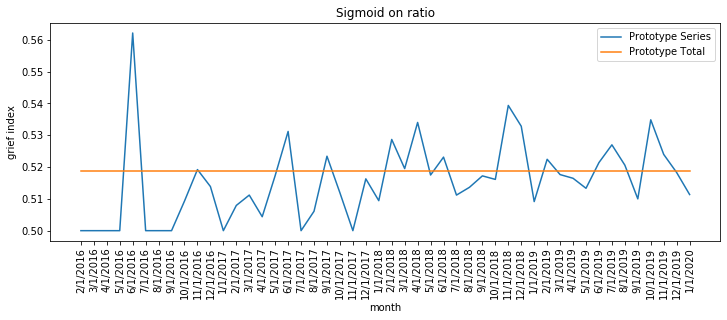

In [6]:
%matplotlib inline

gio_total = [gi_orig] * len(gs_orig)
gip_total = [gi_prototype] * len(gs_proto)

plt.figure(figsize=(12, 4))
plt.plot(list(gs_proto.keys()),list(gs_proto.values()))
plt.plot(gip_total)
plt.legend(["Prototype Series","Prototype Total"])


#plt.plot(list(gs_orig.keys()),list(gs_orig.values()))
#plt.plot(gio_total)
#plt.legend(["Prototype Series","Prototype Total ","Original Series","Original Total"])

plt.ylabel('grief index')
plt.xlabel('month')
plt.title("Sigmoid on ratio")
plt.xticks(rotation=90)
plt.show()

![orig](html/grief_index.png)